<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

Tue Apr 11 16:49:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.12.0


In [ ]:
!pip install -q tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 32.68 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have nump

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [50]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [51]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
               compression='zip',low_memory=False
               )

df.shape

(1306122, 3)

In [53]:
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


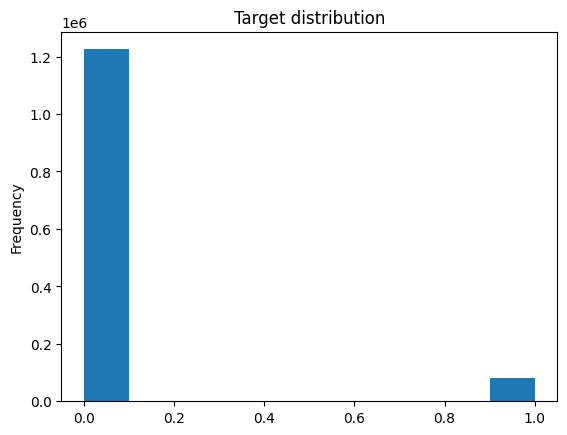

In [54]:
df.target.plot(kind='hist',title="Target distribution");

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [55]:
X_train,X_test,y_train,y_test=train_test_split(df["question_text"],df["target"],random_state=42,train_size=0.0075,stratify=df.target.values)

X_train.shape

(9795,)

In [ ]:
train_df,remaining=train_test_split(df,random_state=42,train_size=0.0075,stratify=df.target.values)
valid_df,_=train_test_split(remaining,random_state=42,train_size=0.00075,stratify=remaining.target.values)
train_df.shape,valid_df.shape

((9795, 3), (972, 3))

In [ ]:
train_sen_ds = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_encoded))
train_sen_ds = train_sen_ds.batch(32).prefetch(tf.data.AUTOTUNE)

val_sen_ds = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_encoded))
val_sen_ds = val_sen_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [62]:
with tf.device('/cpu:0'):
  train_data=tf.data.Dataset.from_tensor_slices((X_train,y_train))
  train_data=train_data.batch(32).prefetch(tf.data.AUTOTUNE)
  valid_data=tf.data.Dataset.from_tensor_slices((X_test,y_test))
  valid_data=valid_data.batch(32).prefetch(tf.data.AUTOTUNE)
  for text,label in train_data.take(1):

    print(text)
    print(label)

tf.Tensor(
[b'Why are unhealthy relationships so desirable?'
 b'Which war changed the course of history of the world?'
 b"I have started a YouTube channel named AskHamy (link is given below). The problem is that I don't want to show myself and instead just want to do a voice-over. What are some things which I can show on screen so that the viewers don't get bored?"
 b'How did Steve Nash make the NBA if he started playing at 15?'
 b'What are the health benefits of eating clean?'
 b'Is there a person that has rescued you before, but you have never met? What would you say to them if you met them?'
 b'Why does a married man goes off to a vacation secrectly?'
 b'How shall I take enrollment in super 30 test?'
 b'Which are the best places to visit with a 1 year old baby in India?'
 b'Did John locke think government was necessary?'
 b'In standard notation for guitar, how do you differentiate a chord arpeggiated by plucking versus a strummed chord?'
 b'Do you believe in sex at first sight?'
 b'

## Importing Bert

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.0 which is incompatible.


In [40]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embedding(sentences):
  preprocessed_text=bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embedding([
    "500$ discount. Hurry up"
])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-8.43517184e-01, -5.13272703e-01, -8.88457239e-01,
         7.89698005e-01,  6.54139817e-01, -1.82695329e-01,
         8.79233301e-01,  2.86654592e-01, -7.99584031e-01,
        -9.99986827e-01, -5.88688195e-01,  8.46215248e-01,
         9.79713559e-01,  5.61665118e-01,  9.29827094e-01,
        -6.58936679e-01, -1.71788812e-01, -6.45385087e-01,
         3.81379902e-01, -3.14514846e-01,  7.85271525e-01,
         9.99994040e-01,  5.48832230e-02,  3.17550421e-01,
         5.85732818e-01,  9.83310938e-01, -7.05831051e-01,
         9.42821383e-01,  9.55939353e-01,  6.75751090e-01,
        -6.40727818e-01,  2.55677730e-01, -9.87087190e-01,
        -2.39285126e-01, -9.43471968e-01, -9.92648184e-01,
         4.19673115e-01, -7.87183225e-01, -1.56248763e-01,
         7.78192207e-02, -9.33006525e-01,  2.95515895e-01,
         9.99981403e-01,  1.26087174e-01,  5.72928429e-01,
        -2.89573431e-01, -1.00000000e+00,  2.35448867e-01,
      

In [ ]:
e =get_sentence_embedding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [ ]:
cosine_similarity([e[0]],[e[3]])

array([[0.84703803]], dtype=float32)

In [ ]:
cosine_similarity([e[3]],[e[4]])

array([[0.9872035]], dtype=float32)

## Creating API model

In [59]:
#Bert layers
text_input=tf.keras.layers.Input(shape=[],dtype=tf.string)
preprocessed_text=bert_preprocess(text_input)
outputs=bert_encoder(preprocessed_text)
#Neural Networks
dropout=tf.keras.layers.Dropout(0.2,name="dropout")(outputs['pooled_output'])
dense1=tf.keras.layers.Dense(32,activation="relu")(dropout)
output_1=tf.keras.layers.Dense(1,activation="sigmoid")(dense1)
model=tf.keras.Model(text_input,output_1)

In [66]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy"
) 

In [67]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['input_8[0][0]']                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [68]:
y_train.value_counts()

target
0    9189
1     606
Name: count, dtype: int64

In [69]:
history=model.fit(X_train,y_train,
                epochs=5
                 )

Epoch 1/5
307/307 [==============================] - 107s 338ms/step - loss: 0.1919 - accuracy: 0.9386
Epoch 2/5
307/307 [==============================] - 104s 339ms/step - loss: 0.1839 - accuracy: 0.9389
Epoch 3/5
307/307 [==============================] - 104s 340ms/step - loss: 0.1804 - accuracy: 0.9414
Epoch 4/5
307/307 [==============================] - 104s 338ms/step - loss: 0.1790 - accuracy: 0.9396
Epoch 5/5
307/307 [==============================] - 104s 339ms/step - loss: 0.1737 - accuracy: 0.9396


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [48]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list=[0,1]# Label categories
max_seq_length=128# maximum length of (token) input sequences
train_batch_size=32

# # Get BERT layer and tokenizer:
# # More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
# bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",trainable=True)

# vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
# tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case)

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing?")

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing?"))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [49]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example=classifier_data_lib.InputExample(guid=None,
                                           text_a=text.numpy(),
                                           text_b=None,
                                           label=label.numpy()
                                           )
  feature=classifier_data_lib.convert_single_example(0,example,label_list,max_seq_length,tokenizer)
  return (feature.input_ids,feature.input_mask,feature.segment_ids,feature.label_id)


NameError: ignored

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):
  input_ids,input_mask,segment_ids,label_id=tf.py_function(to_feature,inp=[text,label],
                                                           Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x={
      'input_word_ids':input_ids,
       'input_mask':input_mask,
     'input_type_ids':segment_ids
  }
  return (x,label_id)
  
  
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [46]:
with tf.device('/cpu:0'):
  # train
  train_data=(train_data.map(to_feature_map,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE
                             ).shuffle(1000)
                              .batch(32,drop_remainder=True)
                              .prefetch(tf.data.experimental.AUTOTUNE)
                             )
  

  # valid
  valid_data=(valid_data.map(to_feature_map,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE
                             )
                             .batch(32,drop_remainder=True)
                             .prefetch(tf.data.experimental.AUTOTUNE)
  )
  
  

NameError: ignored

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
def create_model():
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
    input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_type_ids")

    bert_inputs = [input_word_ids, input_mask, input_type_ids]
    bert_outputs = bert_layer(inputs=bert_inputs) # Update: Pass inputs as keyword argument
    pooled_output = bert_outputs['pooled_output']
    sequence_output = bert_outputs['sequence_output']
    drop = tf.keras.layers.Dropout(0.4)(pooled_output)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

    model = tf.keras.Model(
        inputs=bert_inputs,
        outputs=output)
    return model

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

ValueError: ignored

In [ ]:
# Train model


## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()